In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from data_process import ItemDataset, createTrainDataloader
from model_train import trainModel, plotProcess
from model_test import testModel

# 1. 模型

## 1.1. 配置超参数

In [16]:
class Config:
    def __init__(self, model_name):
        self.device = "cuda" if torch.cuda.is_available() else "cpu" # device to use
        self.learning_rate = 0.001 # 学习率
        self.batch_size = 64 # 更新频率
        self.number_of_epoches = 150 # 训练的回合数
        self.early_stopping_epoches = 50 # 模型如果连续多个回合没有改善则停止
        self.save_dir = model_name # 模型保存名称

## 1.2. 构建网络模型

In [17]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1) # 第一层卷积：输入 1 个通道，输出 16 个通道，卷积核大小为 3，padding = 1
        self.pool = nn.MaxPool1d(2, 2) # 池化层：大小为 2，步长为 2
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1) # 第二层卷积：输入 16 个通道，输出 32 个通道，卷积核大小为 3，padding = 1
        self.fc1 = nn.Linear(32 * 4, 64) # 全连接层 1：输入维度更新为 32 * 4
        self.dropout = nn.Dropout(0.5)  # Dropout 层，丢弃率为 50%
        self.fc2 = nn.Linear(64, 1) # 全连接层 2：输出维度为 1

    def forward(self, x):
        x = x.unsqueeze(1) # 增加通道维度：[batch_size, 17] -> [batch_size, 1, 17]
        x = self.pool(F.relu(self.conv1(x))) # 经过第一层卷积和池化层，输出大小：[batch_size, 16, 17] -> [batch_size, 16, 8]
        x = self.pool(F.relu(self.conv2(x))) # 经过第二层卷积和池化层，输出大小：[batch_size, 32, 8] -> [batch_size, 32, 4]
        x = x.view(-1, 32 * 4) # 展平层：将输出展平成 [batch_size, 32 * 4]
        x = F.relu(self.fc1(x)) # 全连接层 1 
        x = self.dropout(x) # Dropout 层
        x = F.sigmoid(self.fc2(x)) # 全连接层 2，输出 1 个数值
        return x

# 2. 训练

## 2.1. 训练模型

In [18]:
# 定义数据集
config = Config("CNN_dropout") # 创建配置类
dataset_file_path = "./data/input/training_samples/TrainingSamples.pkl"
train_dataset = ItemDataset(dataset_file_path)
train_loader, validation_loader = createTrainDataloader(config, train_dataset)

# 定义模型、损失函数和优化器
model = Model() # 创建模型
model.to(config.device) # 将模型放到设备上
criterion = nn.BCELoss() # 损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate) # 定义随机梯度下降优化器

In [19]:
trainModel(config, train_loader, validation_loader, model, optimizer, criterion)

Start training...
Epoch: 1, train_loss: 0.439158, train_accuracy: 0.791968, validation_loss: 0.293241, validation_accuracy: 0.869525
Epoch: 2, train_loss: 0.298047, train_accuracy: 0.876007, validation_loss: 0.271991, validation_accuracy: 0.884194
Epoch: 3, train_loss: 0.269365, train_accuracy: 0.889773, validation_loss: 0.239325, validation_accuracy: 0.898657
Epoch: 4, train_loss: 0.254502, train_accuracy: 0.895558, validation_loss: 0.223263, validation_accuracy: 0.907851
Epoch: 5, train_loss: 0.254571, train_accuracy: 0.894034, validation_loss: 0.220606, validation_accuracy: 0.906302
Epoch: 6, train_loss: 0.242995, train_accuracy: 0.898993, validation_loss: 0.213399, validation_accuracy: 0.912190
Epoch: 7, train_loss: 0.238228, train_accuracy: 0.901498, validation_loss: 0.216599, validation_accuracy: 0.908781
Epoch: 8, train_loss: 0.233005, train_accuracy: 0.901498, validation_loss: 0.213001, validation_accuracy: 0.911880
Epoch: 9, train_loss: 0.231502, train_accuracy: 0.903202, vali

## 2.2. 绘制训练过程

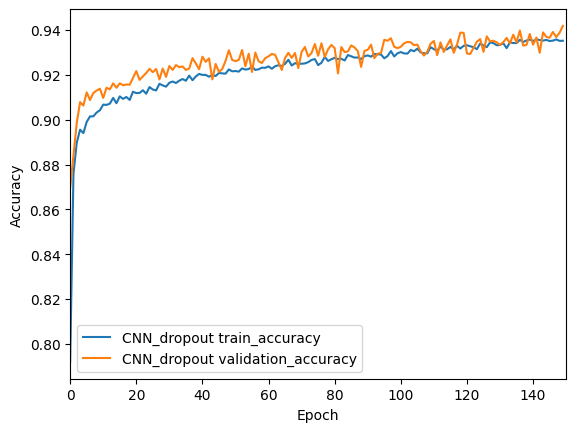

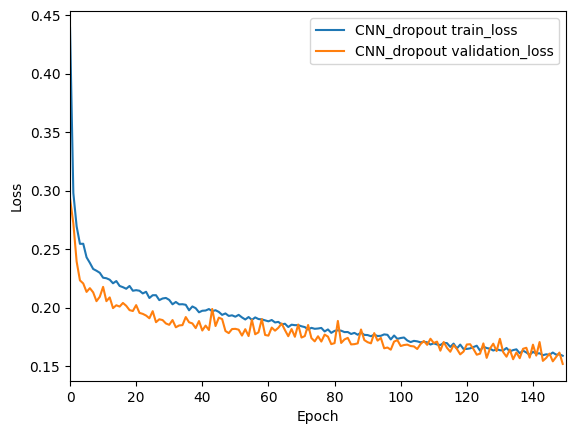

In [20]:
plotProcess(config) # 画出训练过程的图像

# 3. 测试

In [21]:
testModel(config, dataset_file_path = "./data/input/testing_samples/HybridClasses.pkl")

Loading the model...
test_loss: 0.153, test_accuracy: 0.957
[[20253   594]
 [ 1201 19646]]
true_positive_ratio: 0.9715, true_negative_ratio: 0.9424


In [22]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass2.pkl")

Loading the model...
test_loss: 0.245, test_accuracy: 0.905
[[5648  846]
 [ 314 5450]]
true_positive_ratio: 0.8697, true_negative_ratio: 0.9455


In [23]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass3.pkl")

Loading the model...
test_loss: 0.362, test_accuracy: 0.883
[[4915   72]
 [1091 3896]]
true_positive_ratio: 0.9856, true_negative_ratio: 0.7812


In [24]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass4.pkl")

Loading the model...
test_loss: 0.381, test_accuracy: 0.893
[[209   1]
 [ 44 166]]
true_positive_ratio: 0.9952, true_negative_ratio: 0.7905


In [26]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass5.pkl")

Loading the model...
test_loss: 0.000, test_accuracy: 1.000
[[62734]]


d:\ComputerSoftware\Python\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
d:\ComputerSoftware\Python\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
d:\ComputerSoftware\Python\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
d:\ComputerSoftware\Python\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the c

IndexError: index 1 is out of bounds for axis 0 with size 1